In this note book I am going to analyze the apple-watch-and-fitibit-data dataset, as part of my Google Capstone project. I decided to use R to study this dataset.

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, heres a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(skimr)     ### for skim_without_charts

install.packages('reshape2')
library(reshape2)  ### for melt

list.files(path = "../input/apple-watch-and-fitbit-data/")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they wont be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




[1] "aw_fb_data.csv"       "data_for_weka_aw.csv" "data_for_weka_fb.csv"

In [2]:
fbDf <- read.csv('../input/apple-watch-and-fitbit-data/data_for_weka_fb.csv')
head(fbDf)
skim_without_charts(fbDf)

,X,age,gender,height,weight,Fitbit.Steps_LE,Fitbit.Heart_LE,Fitbit.Calories_LE,Fitbit.Distance_LE,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE,activity_trimmed
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,20,1,168,65.4,1,132.0000,1.0,1,5.938588,2.179799,130.4286,1.0000000,1.5714286,0.022587269,1.000000,1,Lying
2,2,20,1,168,65.4,1,132.7778,1.0,1,5.938588,2.179799,130.4286,1.0000000,2.3492063,0.033766826,1.000000,1,Lying
3,3,20,1,168,65.4,1,129.8889,1.0,1,5.938588,2.179799,130.4286,1.0000000,-0.5396825,-0.007757244,1.000000,1,Lying
4,4,20,1,168,65.4,1,129.1429,1.0,1,5.938588,2.179799,130.4286,1.0000000,-1.2857143,-0.018480493,1.000000,1,Lying
5,11,20,1,168,65.4,1,134.5556,3.5,1,5.938588,2.179799,130.4286,-0.4935887,4.1269841,0.059320100,1.368007,1,Self Pace walk
6,12,20,1,168,65.4,1,132.0000,62.0,1,5.938588,2.179799,130.4286,0.8835429,1.5714286,0.022587269,3.260676,1,Self Pace walk


── Data Summary ────────────────────────
                           Values
Name                       fbDf  
Number of rows             2608  
Number of columns          18    
_______________________          
Column type frequency:           
  character                1     
  numeric                  17    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate   min   max empty n_unique whitespace
1 activity_trimmed         0             1     5    14     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable                      n_missing complete_rate     mean       sd
 1 X                                          0             1 1682.    1141.   
 2 age                                        0             1   28.8      8.71 
 3 gender                                     0      

In [3]:
awDf <- read.csv('../input/apple-watch-and-fitbit-data/data_for_weka_aw.csv')
head(awDf)
skim_without_charts(awDf)

,X,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,20,1,168,65.4,10.77143,78.53130,0.3445329,0.008326857,6.221612,6.116349,59,1.0000000,19.53130,0.1385199,1.000000,0.08969215,Lying
2,2,20,1,168,65.4,11.47532,78.45339,3.2876255,0.008896346,6.221612,6.116349,59,1.0000000,19.45339,0.1379673,1.000000,0.10208846,Lying
3,3,20,1,168,65.4,12.17922,78.54083,9.4840000,0.009465835,6.221612,6.116349,59,1.0000000,19.54083,0.1385874,1.000000,0.11528650,Lying
4,4,20,1,168,65.4,12.88312,78.62826,10.1545556,0.010035325,6.221612,6.116349,59,1.0000000,19.62826,0.1392075,1.000000,0.12928626,Lying
5,5,20,1,168,65.4,13.58701,78.71569,10.8251111,0.010604814,6.221612,6.116349,59,0.9828157,19.71569,0.1398276,0.241567,0.14408774,Lying
6,6,20,1,168,65.4,14.29091,78.80313,11.4956667,0.011174303,6.221612,6.116349,59,1.0000000,19.80313,0.1404477,0.264722,0.15969095,Sitting


── Data Summary ────────────────────────
                           Values
Name                       awDf  
Number of rows             3656  
Number of columns          18    
_______________________          
Column type frequency:           
  character                1     
  numeric                  17    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate   min   max empty n_unique whitespace
1 activity_trimmed         0             1     5    14     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable                          n_missing complete_rate       mean
 1 X                                              0             1 1835.     
 2 age                                            0             1   29.4    
 3 gender                                         0           

In [4]:
df <- read.csv('../input/apple-watch-and-fitbit-data/aw_fb_data.csv')
head(df)
skim_without_charts(df)

,X,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,1,20,1,168,65.4,10.77143,78.53130,0.3445329,0.008326857,6.221612,6.116349,59,1.0000000,19.53130,0.1385199,1.000000,0.08969215,apple watch,Lying
2,2,2,20,1,168,65.4,11.47532,78.45339,3.2876255,0.008896346,6.221612,6.116349,59,1.0000000,19.45339,0.1379673,1.000000,0.10208846,apple watch,Lying
3,3,3,20,1,168,65.4,12.17922,78.54083,9.4840000,0.009465835,6.221612,6.116349,59,1.0000000,19.54083,0.1385874,1.000000,0.11528650,apple watch,Lying
4,4,4,20,1,168,65.4,12.88312,78.62826,10.1545556,0.010035325,6.221612,6.116349,59,1.0000000,19.62826,0.1392075,1.000000,0.12928626,apple watch,Lying
5,5,5,20,1,168,65.4,13.58701,78.71569,10.8251111,0.010604814,6.221612,6.116349,59,0.9828157,19.71569,0.1398276,0.241567,0.14408774,apple watch,Lying
6,6,6,20,1,168,65.4,14.29091,78.80313,11.4956667,0.011174303,6.221612,6.116349,59,1.0000000,19.80313,0.1404477,0.264722,0.15969095,apple watch,Sitting


── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             6264  
Number of columns          20    
_______________________          
Column type frequency:           
  character                2     
  numeric                  18    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 device                0             1     6    11     0        2          0
2 activity              0             1     5    14     0        6          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable        n_missing complete_rate     mean       sd        p0
 1 X                            0             1 3132.    1808.      1      
 2 X1                           0             1 1771.    1098.      1

Checking for duplicates:

In [5]:
data.frame(table(df$id))

Freq
<int>


## Analyzing the dataset

### Correlations between variables

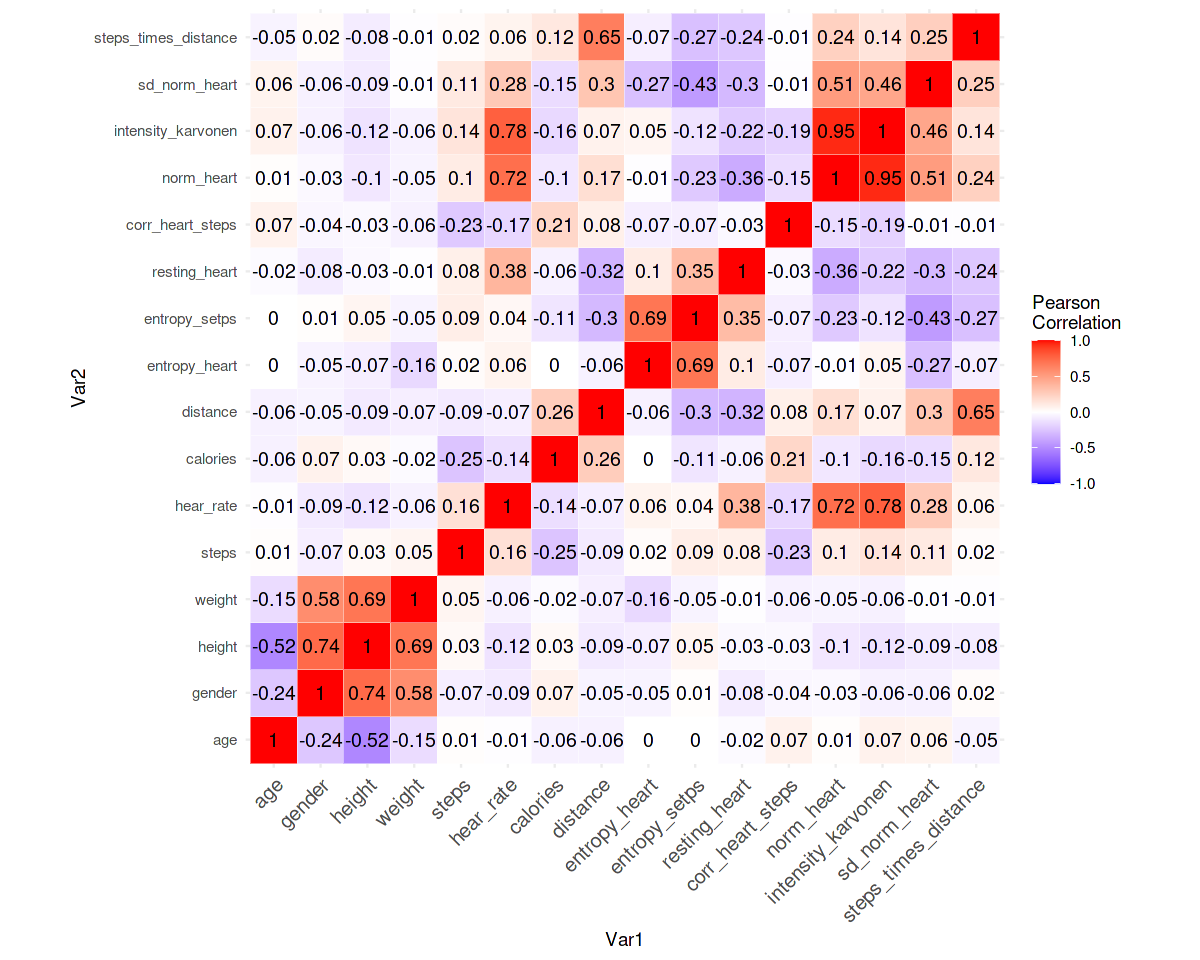

In [6]:
options(repr.plot.width=10, repr.plot.height=8)

# corrMat <- melt( round( cor( subset(df, select=-c(X,X1,device,activity)) ), 2) )
corrMat <- df %>% subset(select=-c(X,X1,device,activity)) %>% cor() %>% round(2) %>% melt()
ggplot(data = corrMat, aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile(color='white') +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab",  name="Pearson\nCorrelation") +
    theme_minimal()+ # minimal theme
    theme(axis.text.x = element_text(angle = 45, vjust = 1,  size = 12, hjust = 1)) +
    coord_fixed() +
    geom_text(aes(Var2, Var1, label = value), color = "black", size = 4)

### Fitbit vs apple records validation

In [7]:
aggDf <- df[, c('age','gender','height','weight','device')] %>%  group_by(age,gender,height,weight,device) %>% count() 
fbAggDf <- aggDf %>% filter(device=='fitbit') %>% subset(select=-c(device))
awAggDf <- aggDf %>% filter(device=='apple watch') %>% subset(select=-c(device))
summaryDf <- merge(fbAggDf, awAggDf, by=c('age','gender','height','weight')) %>% rename( fitbit=n.x, appleWatch=n.y )
summaryDf$diffDevices <- (summaryDf$appleWatch - summaryDf$fitbit)
summaryDf

age,gender,height,weight,fitbit,appleWatch,diffDevices
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
18,1,180.3,90.0,9,73,64
18,1,183.0,70.3,62,75,13
19,0,172.0,72.5,69,69,0
19,1,180.0,62.7,78,78,0
19,1,183.0,65.7,79,79,0
20,1,168.0,65.4,64,76,12
20,1,180.0,79.3,76,76,0
20,1,184.0,77.3,14,73,59
22,0,168.0,62.0,56,77,21


In [8]:
count(filter(summaryDf, diffDevices==0), gender)
fbAggDf[, c('gender')] %>% count()
# summaryDf

gender,n
<int>,<int>
0,14
1,13


gender,n
<int>,<int>
0,26
1,23


In [9]:
summary(summaryDf$appleWatch)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.00   72.00   74.00   74.61   77.00   89.00 

## Focusing on Apple watch data

In [10]:
# aggAwDf <- aggregate( .~ age + gender + height + weight + activity_trimmed, data=awDf, FUN=mean )
aggAwDf <- aggregate( .~ age + gender + height + weight, data=subset(awDf,select=-activity_trimmed), FUN=mean )
aggAwDf$gender <- as.factor(ifelse(aggAwDf$gender==0,'female','male'))
aggAwDf

age,gender,height,weight,X,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24,female,165.0,43.0,184.000,740.61481,101.67080,0.06097088,0.011710427,6.135030,6.189825,76.50000,0.110108160,25.17080386,0.2106343419,10.5552114,8.2014388
49,female,152.0,48.6,3106.500,41.74769,91.12575,0.27131414,0.028142250,6.142147,5.787845,60.84615,-0.035687636,30.27959223,0.2748845663,13.5046504,4.8257215
53,female,143.0,49.2,862.500,48.09284,84.90874,0.62934469,0.036761308,6.221612,6.247928,66.81780,0.545528828,18.09093883,0.1805803650,4.9932795,13.3300087
25,female,160.0,52.5,3031.500,48.99803,115.20256,0.25643602,0.036741599,6.157197,6.157197,88.00000,-0.200076279,27.20255650,0.2542295000,12.6548986,6.4736558
36,female,157.5,53.6,1317.500,57.05595,84.12099,15.19083095,0.030571238,6.008680,6.103885,78.82345,0.169900311,5.29753828,0.0503680537,1.6147068,9.5159256
29,female,159.0,55.0,3561.500,442.31438,116.70018,0.87955707,0.168315332,6.209453,5.972835,80.62151,-0.019454888,36.07867149,0.3268632560,7.2679335,94.1183148
30,female,168.0,56.0,2658.000,337.42740,99.31495,5.66176609,0.188943537,6.135030,6.080236,72.00000,0.107412230,27.31495332,0.2314826552,13.8499398,114.7756852
25,female,160.0,57.7,2882.500,403.11637,106.76902,4.11096018,0.120317852,6.142147,6.020552,78.53130,0.166598348,28.23771529,0.2424489658,15.2821417,55.0296713
37,female,157.0,58.0,3178.500,63.80937,106.94726,0.32230742,0.049389247,6.058814,5.909440,68.00000,0.179248483,38.94725986,0.3386718249,12.6665667,29.4359149


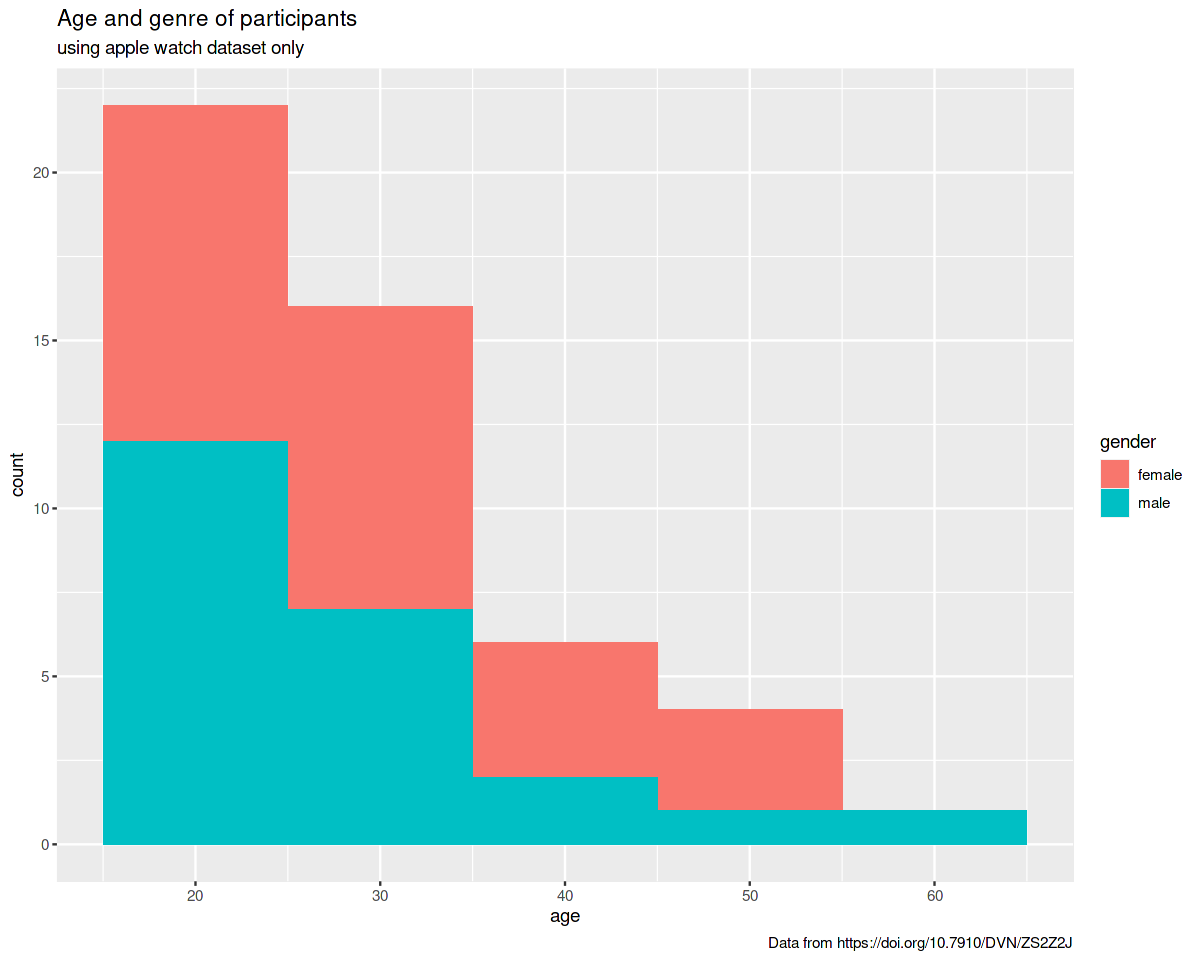

In [11]:
ggplot(aggAwDf, aes(x=age, fill=gender)) + 
    geom_histogram(binwidth=10) + #facet_grid(~gender) +
    labs(title='Age and genre of participants', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

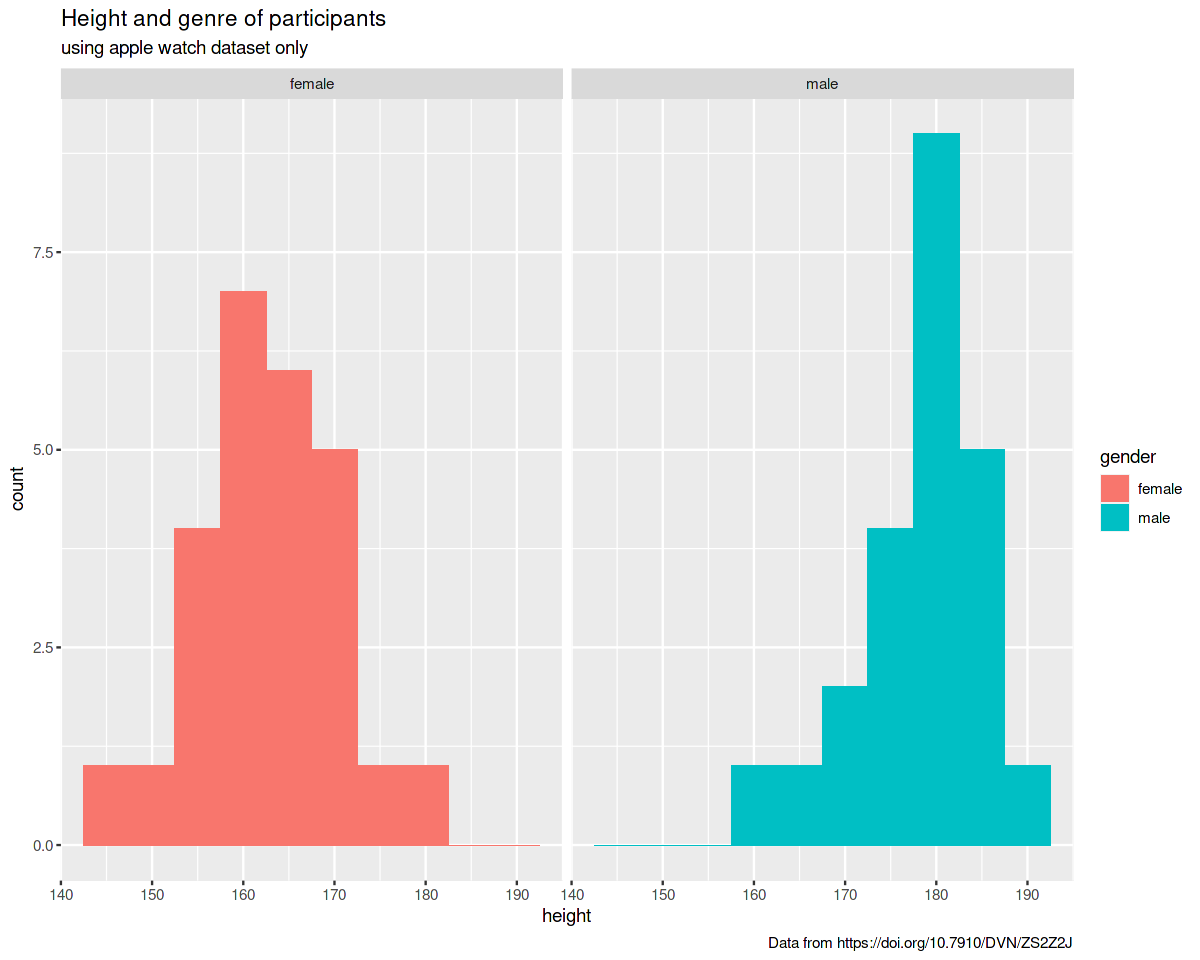

In [12]:
ggplot(aggAwDf, aes(x=height, fill=gender)) + 
    geom_histogram(binwidth=5) + facet_grid(~gender) +
    labs(title='Height and genre of participants', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

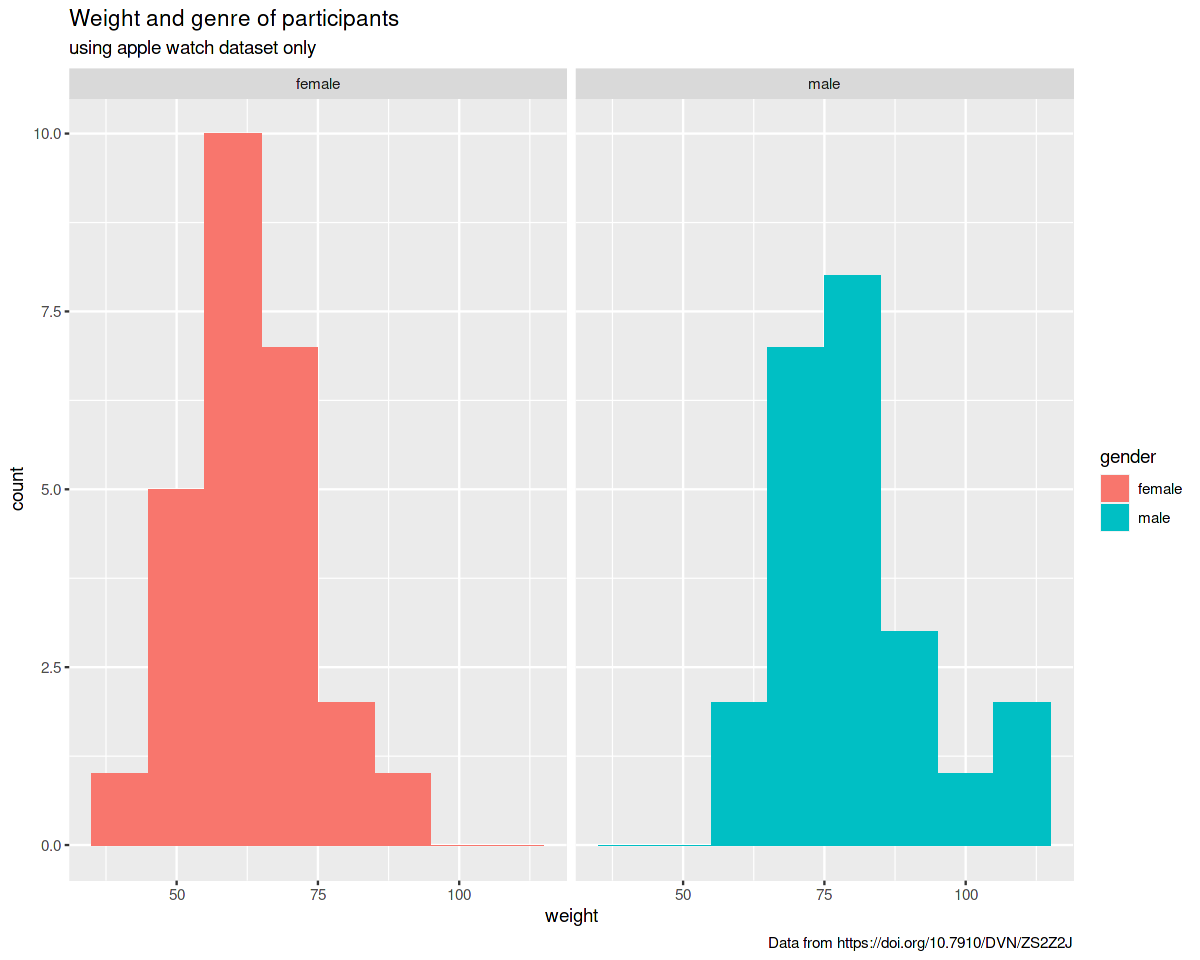

In [13]:
ggplot(aggAwDf, aes(x=weight, fill=gender)) + 
    geom_histogram(binwidth=10) + facet_grid(~gender) +
    labs(title='Weight and genre of participants', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

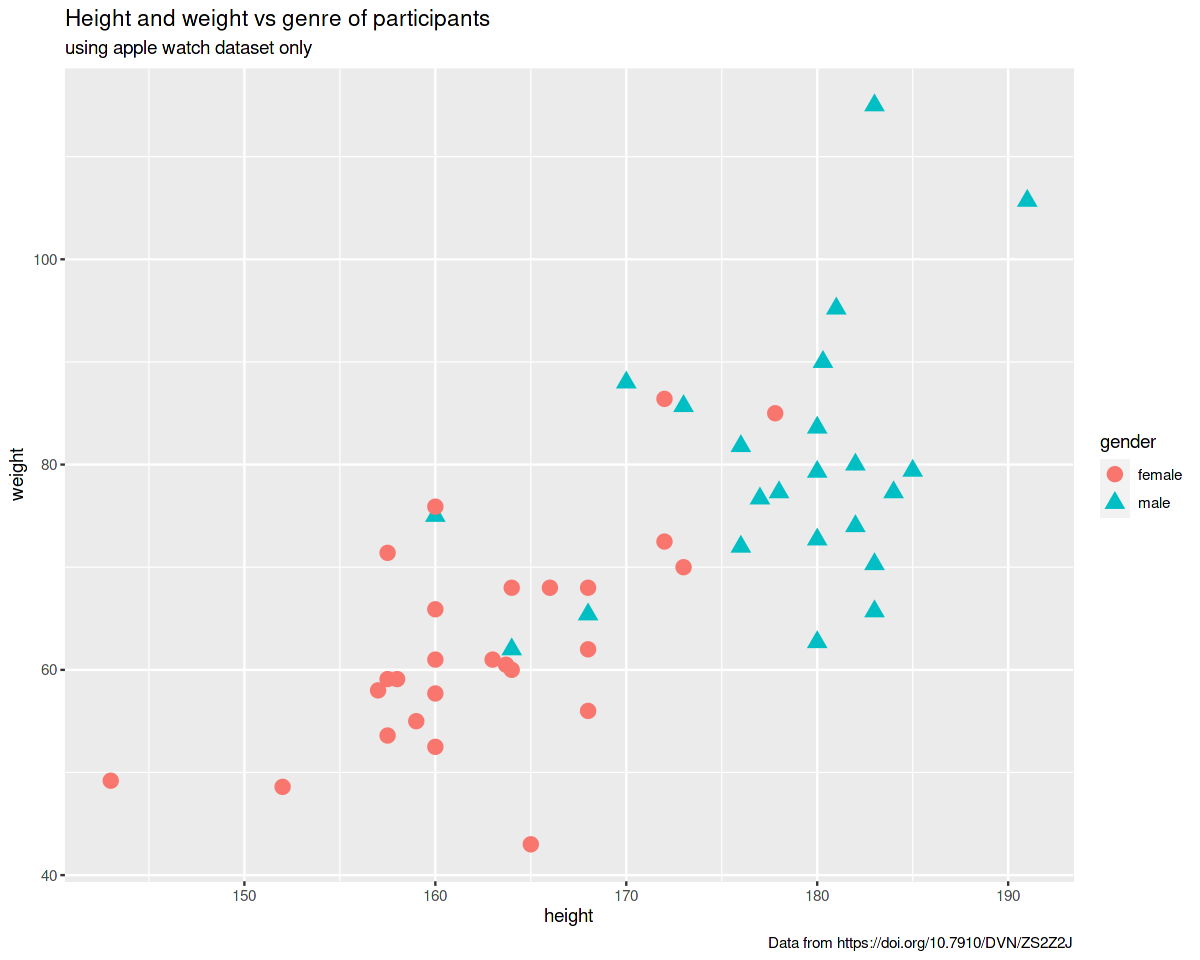

In [14]:
ggplot(aggAwDf, aes(x=height, y=weight, color=gender, shape=gender)) + 
    geom_point(size=4) + 
    labs(title='Height and weight vs genre of participants', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

In [15]:
# aggAwDf <- aggregate( .~ age + gender + height + weight + activity_trimmed, data=awDf, FUN=sum )
aggAwDf <- awDf %>% group_by(age, gender, height, weight, activity_trimmed) %>%
            summarize(steps=sum(Applewatch.Steps_LE), heartrate=mean(Applewatch.Heart_LE), calories=sum(Applewatch.Calories_LE), 
                       distance=sum(Applewatch.Distance_LE), entropyHRPerDay=mean(EntropyApplewatchHeartPerDay_LE), 
                       entropyStepsPerDay=mean(EntropyApplewatchStepsPerDay_LE), restingHR=mean(RestingApplewatchHeartrate_LE),
                       corrHRSteps=mean(CorrelationApplewatchHeartrateSteps_LE), normHR=mean(NormalizedApplewatchHeartrate_LE),
                       intensity=mean(ApplewatchIntensity_LE), sdNormHR=mean(SDNormalizedApplewatchHR_LE), 
                       stepsXDistance=sum(ApplewatchStepsXDistance_LE))
aggAwDf$gender <- as.factor(ifelse(aggAwDf$gender==0,'female','male'))
aggAwDf <- rename(aggAwDf, activity=activity_trimmed)
aggAwDf$activity <- factor(aggAwDf$activity, levels=c('Lying','Sitting','Self Pace walk','Running 3 METs','Running 5 METs','Running 7 METs'))
aggAwDf

`summarise()` has grouped output by 'age', 'gender', 'height', 'weight'. You can override using the `.groups` argument.



age,gender,height,weight,activity,steps,heartrate,calories,distance,entropyHRPerDay,entropyStepsPerDay,restingHR,corrHRSteps,normHR,intensity,sdNormHR,stepsXDistance
<int>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,male,180.3,90.0,Lying,2873.28571,82.06246,106.457258,1.93017500,6.189825,5.987703,79.00000,0.236763237,3.062464,0.024898083,10.2217085,663.8601631
18,male,180.3,90.0,Running 3 METs,1585.50000,90.69697,113.579800,0.67646833,6.189825,5.987703,79.00000,0.196085382,11.696970,0.095097315,4.8342096,121.6662183
18,male,180.3,90.0,Running 5 METs,7147.21429,119.06250,16.102533,1.88213000,6.189825,5.987703,79.00000,0.362631812,40.062500,0.325711382,18.5969019,1090.9981429
18,male,180.3,90.0,Running 7 METs,2434.67143,171.35623,8.258100,1.29849160,6.189825,5.987703,79.00000,0.398932436,92.356227,0.750863635,31.7276885,433.0731502
18,male,180.3,90.0,Self Pace walk,2034.00000,92.95455,45.475733,1.20672000,6.189825,5.987703,79.00000,-0.129411171,13.954545,0.113451589,6.5918447,577.7301700
18,male,180.3,90.0,Sitting,5540.71429,98.32964,72.855333,2.01939500,6.189825,5.987703,79.00000,-0.018758217,19.329641,0.157151550,13.5728727,1364.9779471
18,male,183.0,70.3,Lying,5612.55714,106.61395,184.559292,2.89909238,6.228819,6.175485,58.13433,0.934882607,48.479619,0.336978376,14.0059121,3286.5566735
18,male,183.0,70.3,Running 3 METs,1300.62857,107.80882,182.563400,0.36745024,6.228819,6.175485,58.13433,1.000000000,49.674490,0.345283843,6.6786405,40.2829293
18,male,183.0,70.3,Running 5 METs,247.39286,70.12418,230.839800,0.15368794,6.228819,6.175485,58.13433,0.546447633,11.989850,0.083340591,4.3287577,4.2296511


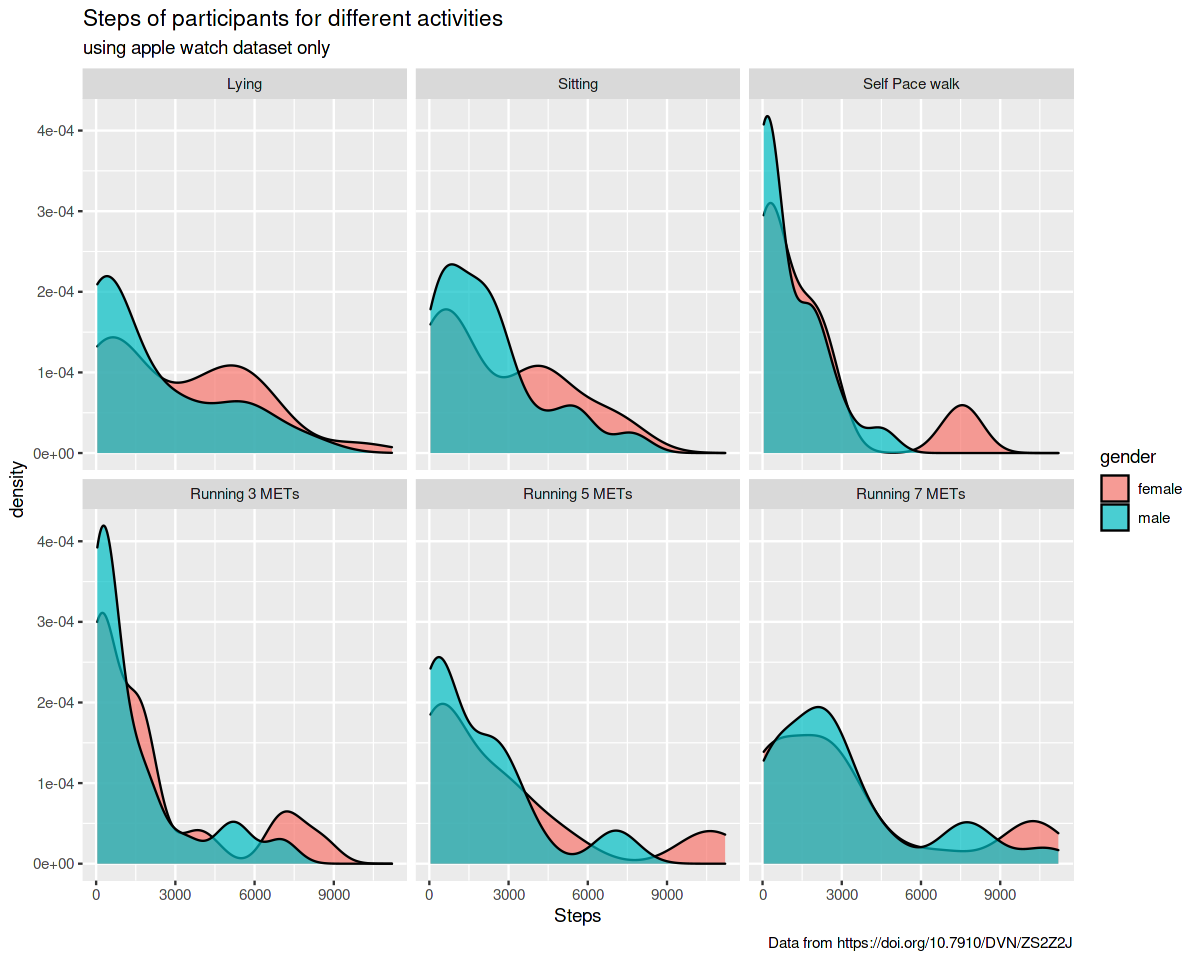

In [16]:
ggplot(aggAwDf, aes(x=steps, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Steps of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Steps'
        )

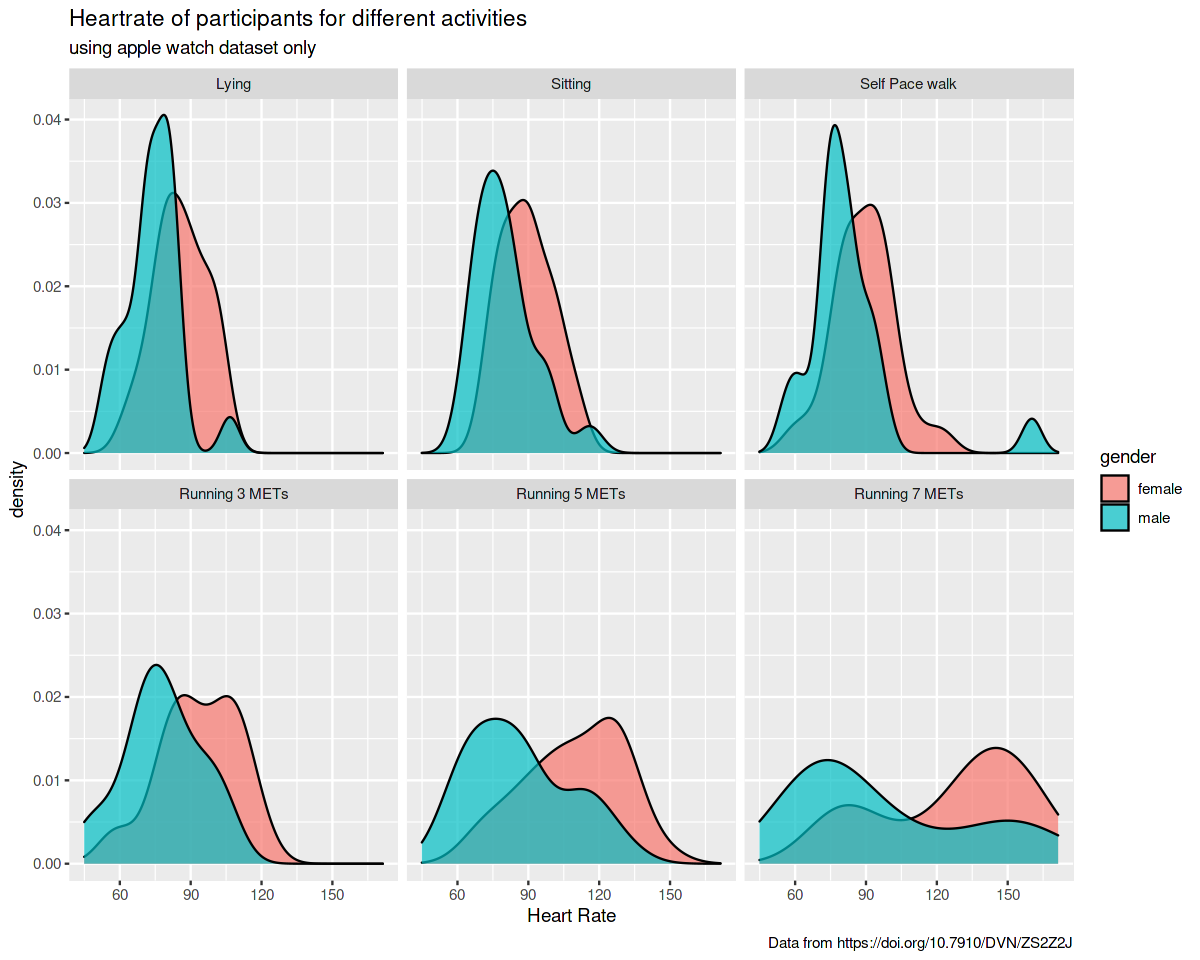

In [17]:
ggplot(aggAwDf, aes(x=heartrate, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Heartrate of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Heart Rate'
        )

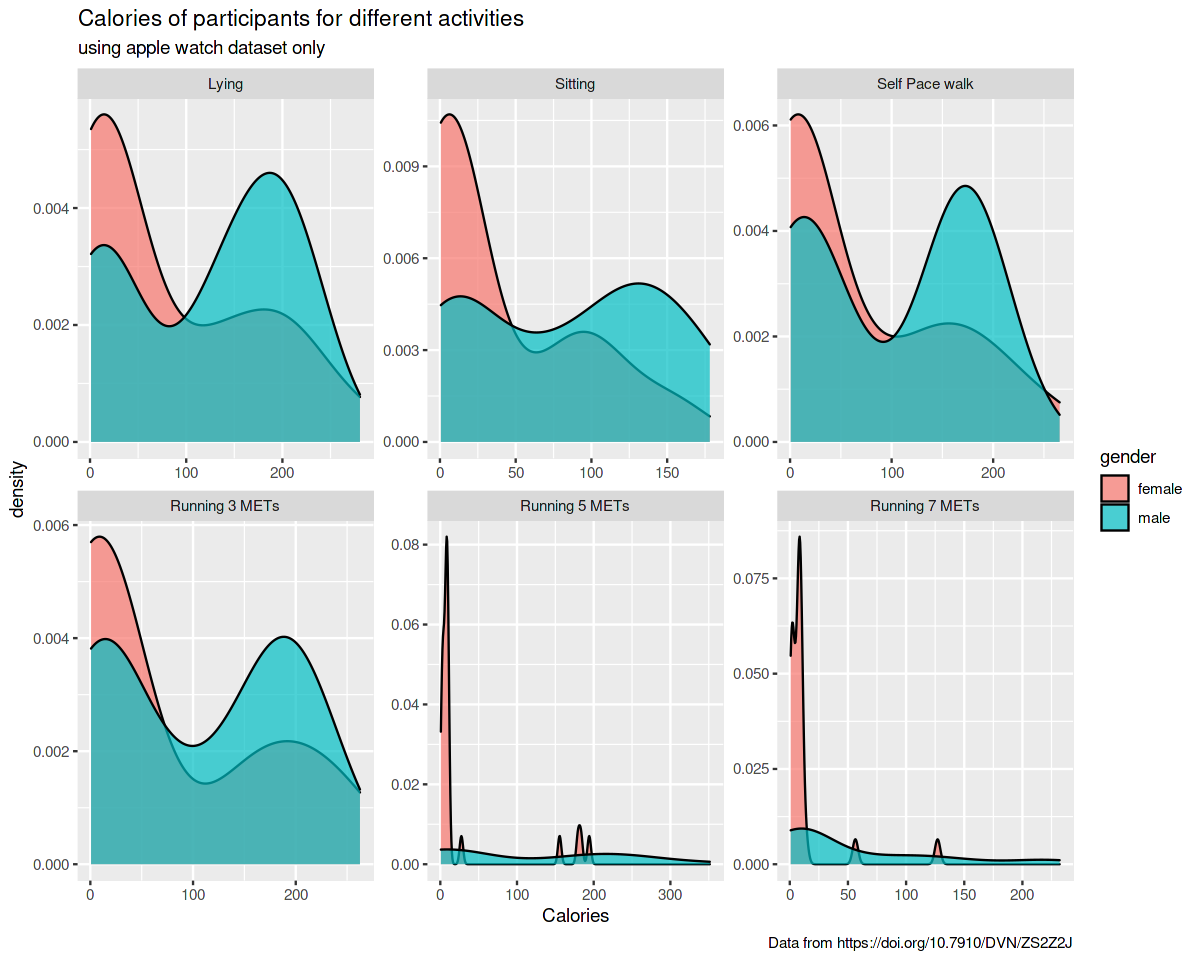

In [18]:
ggplot(aggAwDf, aes(x=calories, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity, scales='free') +
    labs(title='Calories of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Calories'
        )

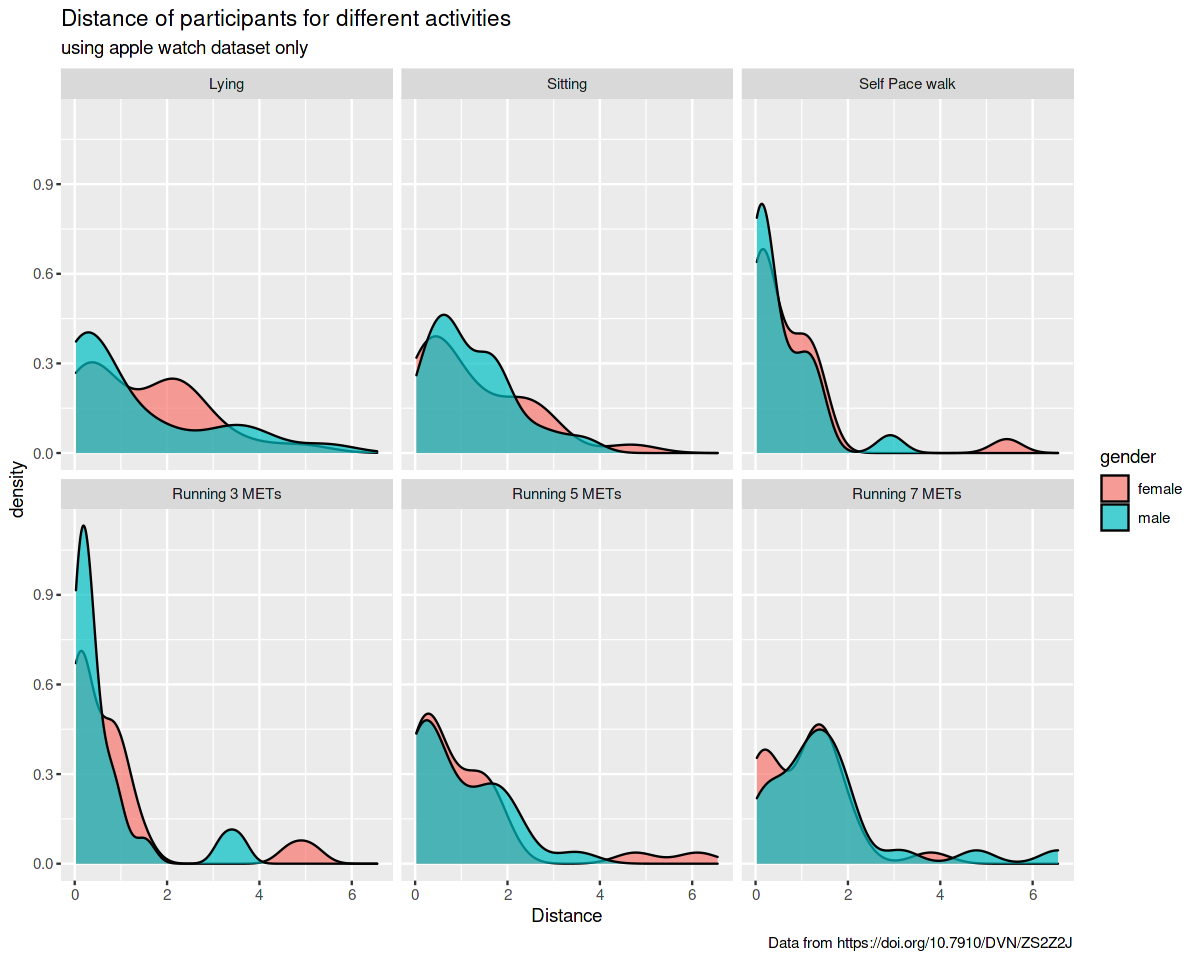

In [19]:
ggplot(aggAwDf, aes(x=distance, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Distance of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Distance'
        )

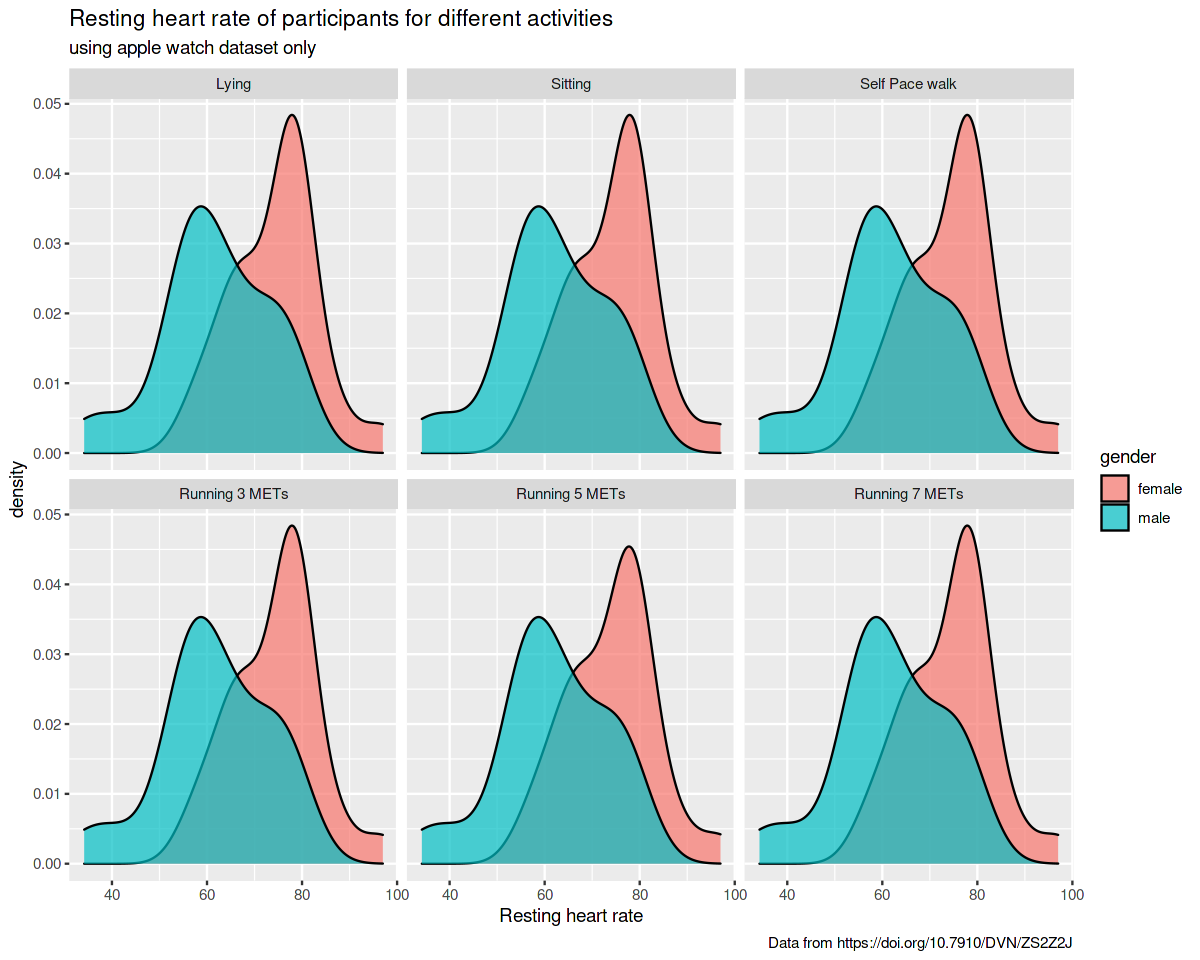

In [20]:
ggplot(aggAwDf, aes(x=restingHR, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Resting heart rate of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Resting heart rate'
        )

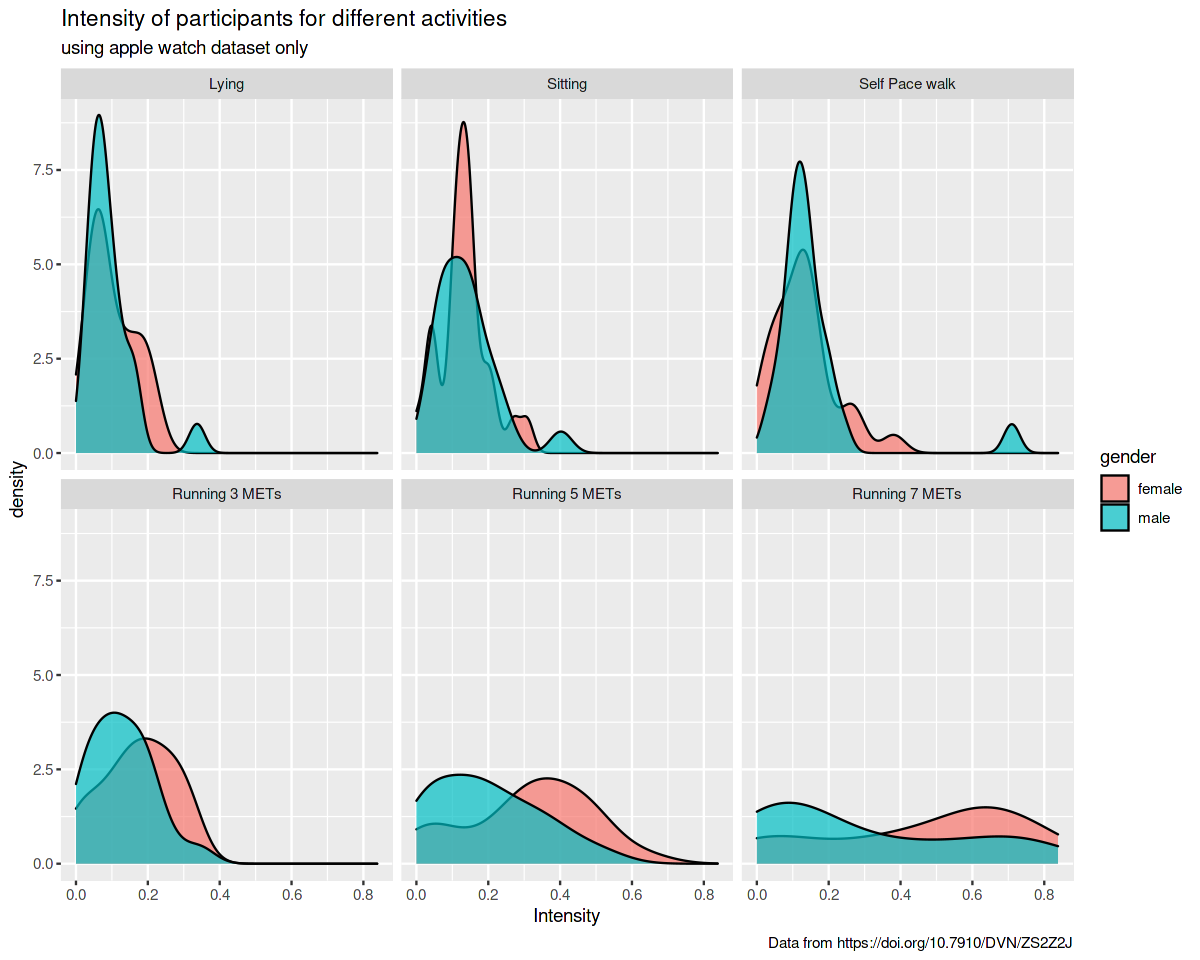

In [21]:
ggplot(aggAwDf, aes(x=intensity, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Intensity of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Intensity'
        )

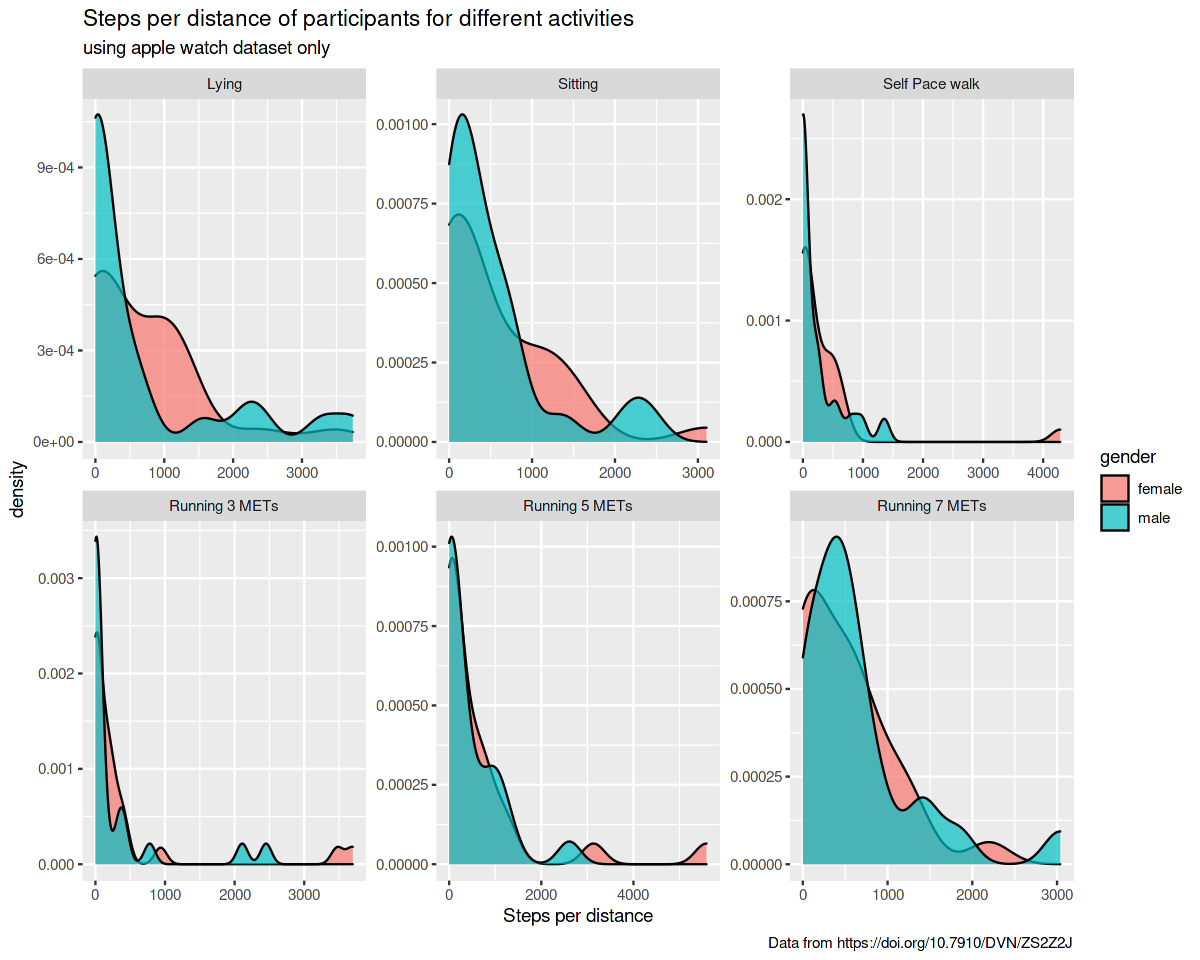

In [22]:
ggplot(aggAwDf, aes(x=stepsXDistance, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity, scale='free') +
    labs(title='Steps per distance of participants for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Steps per distance'
        )

### Looking deeper into the variables with higher differences

In [23]:
require(gridExtra)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




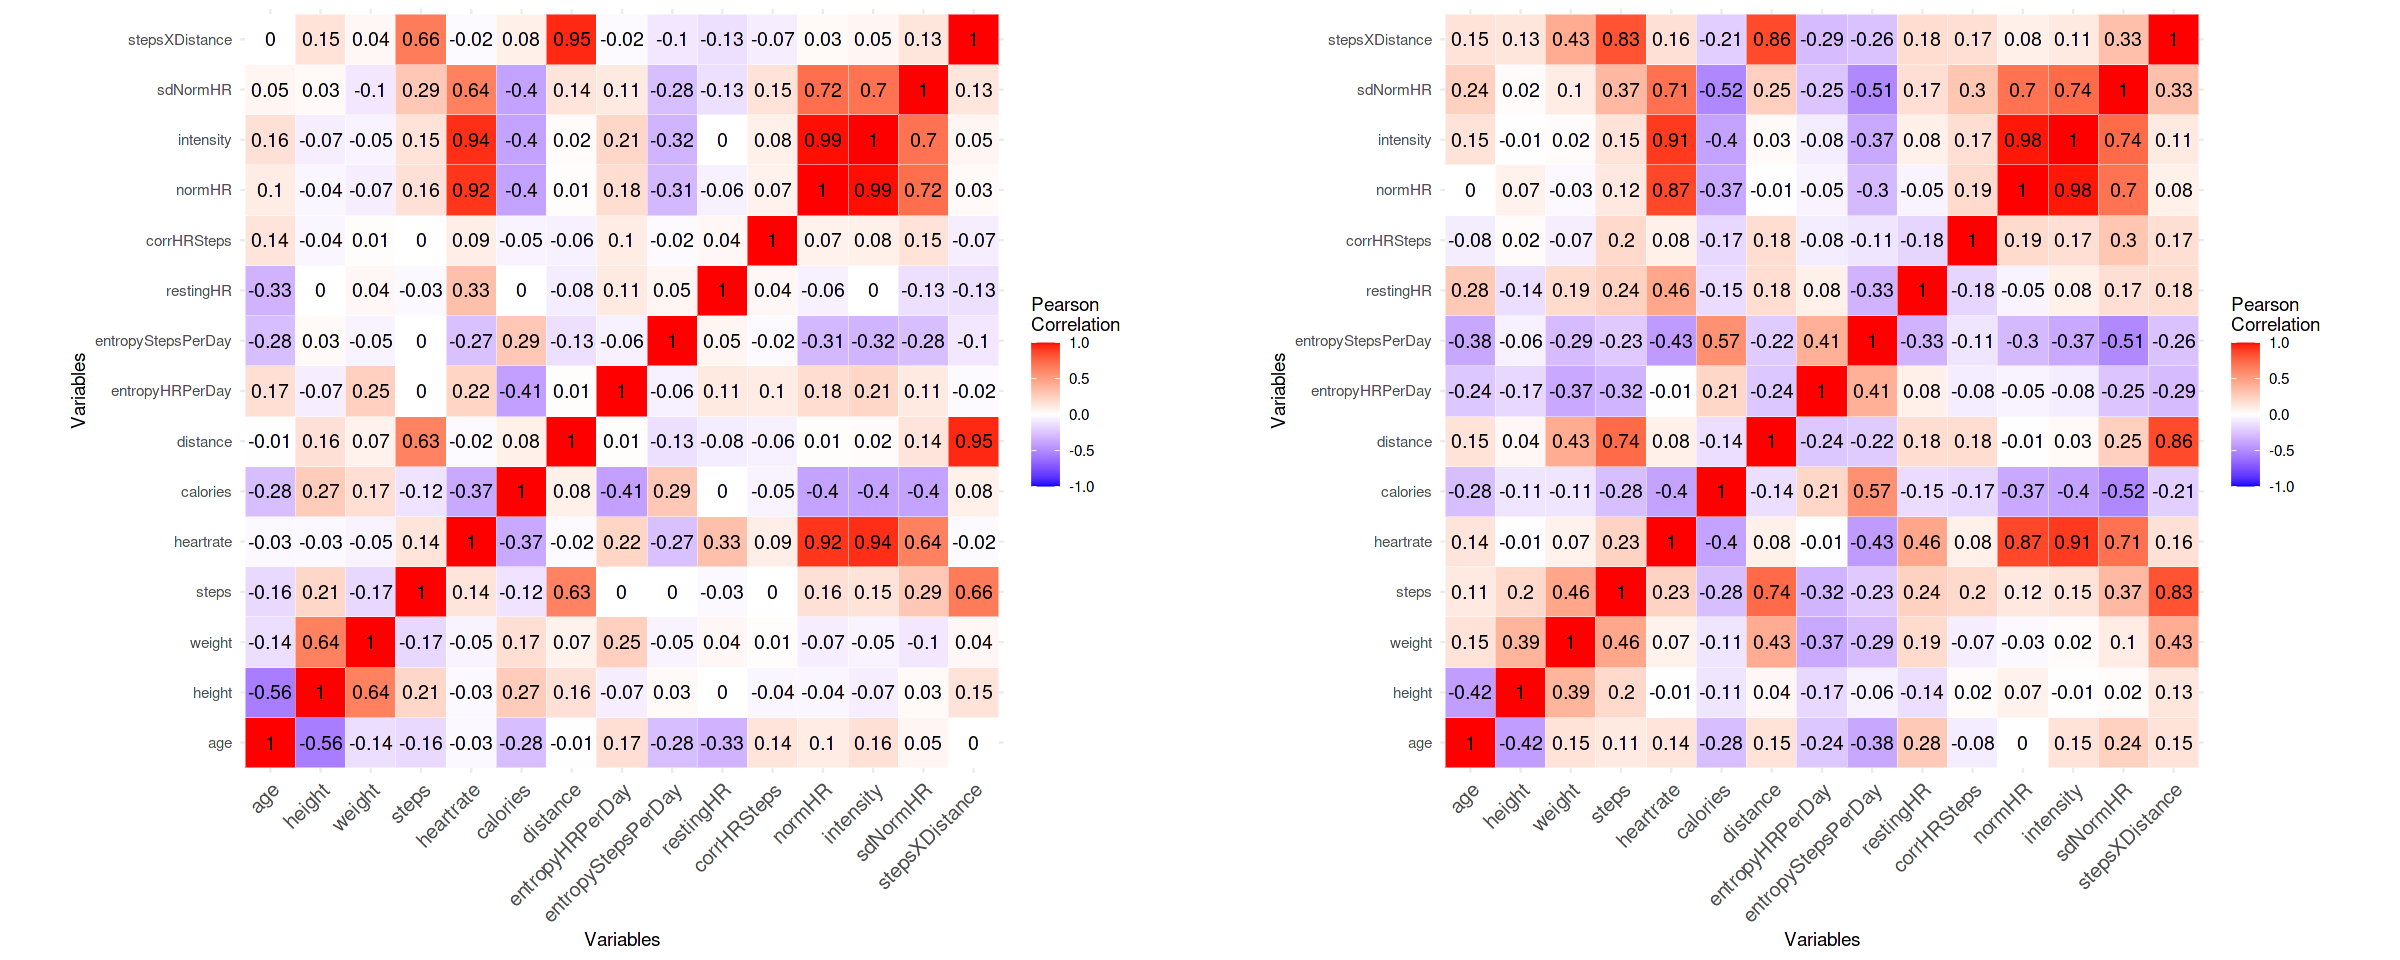

In [24]:
options(repr.plot.width=20, repr.plot.height=8)

corrMatFemale <- aggAwDf %>% filter(gender=='female') %>% subset(select=-c(activity,gender))  %>% cor() %>% round(2) %>% melt()
corrMatMale <- aggAwDf %>% filter(gender=='male') %>% subset(select=-c(activity,gender))  %>% cor() %>% round(2) %>% melt()

femalePlot <- ggplot(data = corrMatFemale, aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile(color='white') +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab",  name="Pearson\nCorrelation") +
    theme_minimal()+ # minimal theme
    theme(axis.text.x = element_text(angle = 45, vjust = 1,  size = 12, hjust = 1)) +
    coord_fixed() +
    geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) + 
    labs( x='Variables', y='Variables')

malePlot <- ggplot(data = corrMatMale, aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile(color='white') +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                         midpoint = 0, limit = c(-1,1), space = "Lab",  name="Pearson\nCorrelation") +
    theme_minimal()+ # minimal theme
    theme(axis.text.x = element_text(angle = 45, vjust = 1,  size = 12, hjust = 1)) +
    coord_fixed() +
    geom_text(aes(Var2, Var1, label = value), color = "black", size = 4) + 
    labs( x='Variables', y='Variables')

grid.arrange(femalePlot, malePlot, ncol=2)

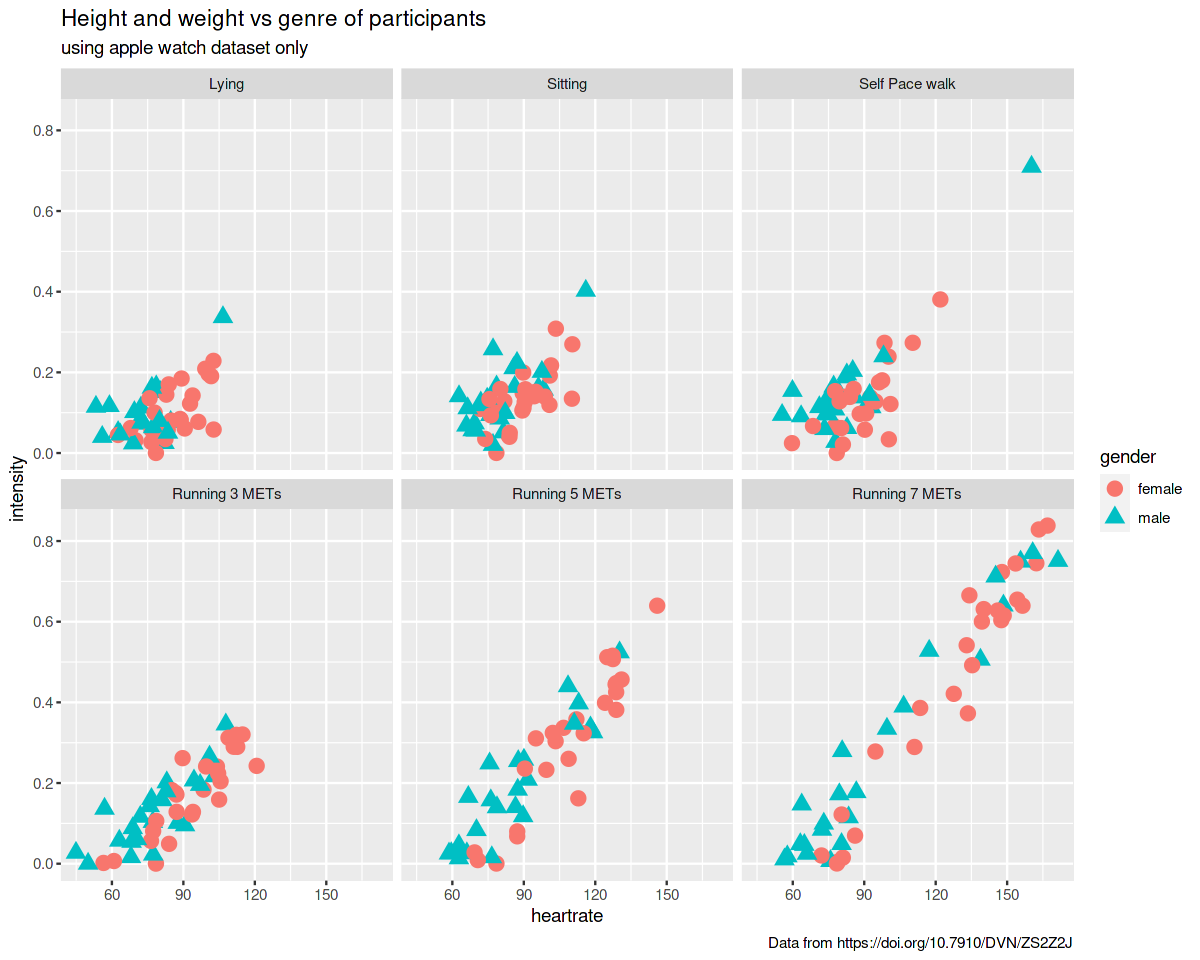

In [25]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(aggAwDf, aes(x=heartrate, y=intensity, color=gender, shape=gender)) + 
    geom_point(size=4) + 
    facet_wrap(~activity) + 
    labs(title='Height and weight vs genre of participants', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J')

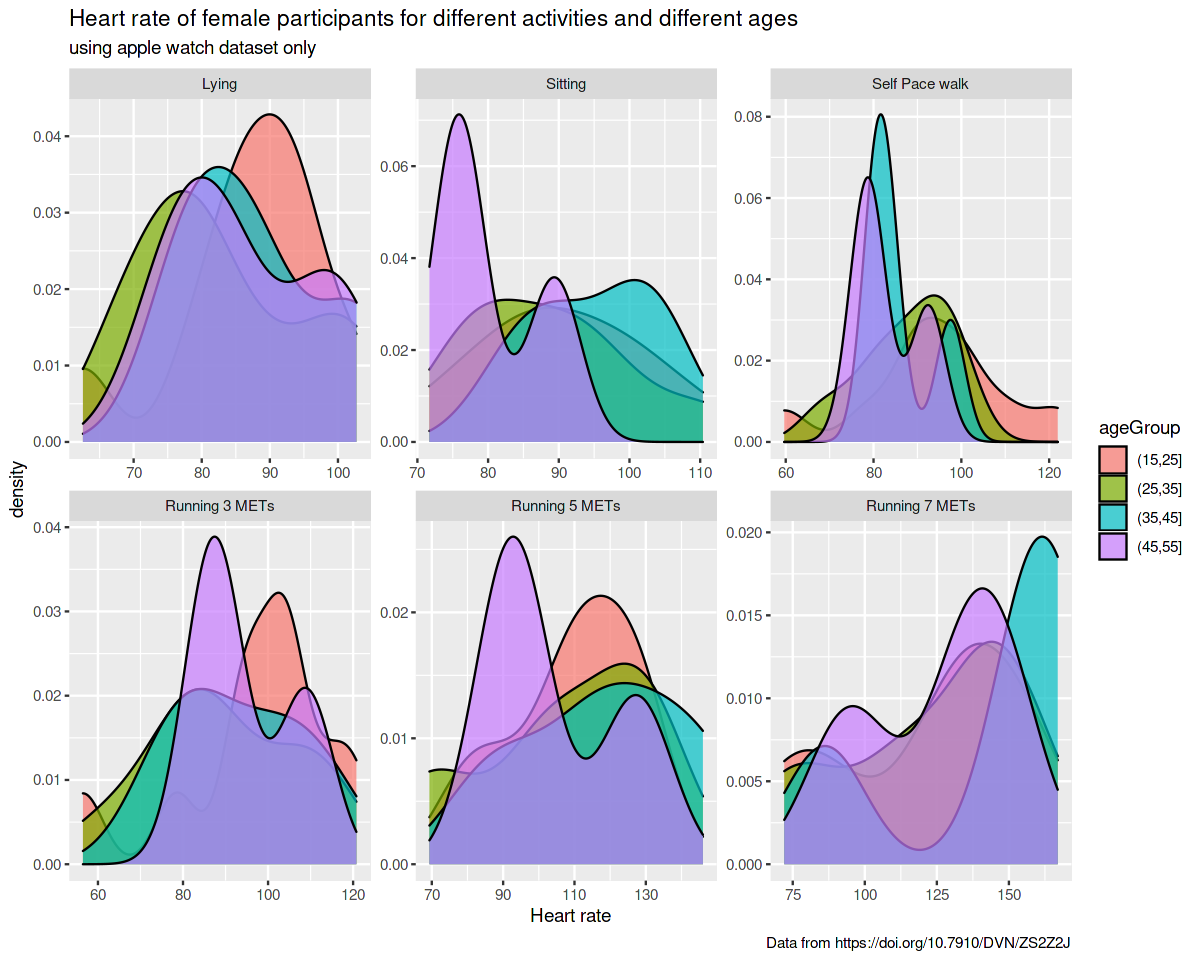

In [26]:
aggAwDf$ageGroup = cut(aggAwDf$age,c(15,25,35,45,55,65))
femAggAwDf <- aggAwDf %>% filter(gender=='female')
ggplot(femAggAwDf, aes(x=heartrate, fill=ageGroup)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity, scale='free') +
    labs(title='Heart rate of female participants for different activities and different ages', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Heart rate'
        )

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max;

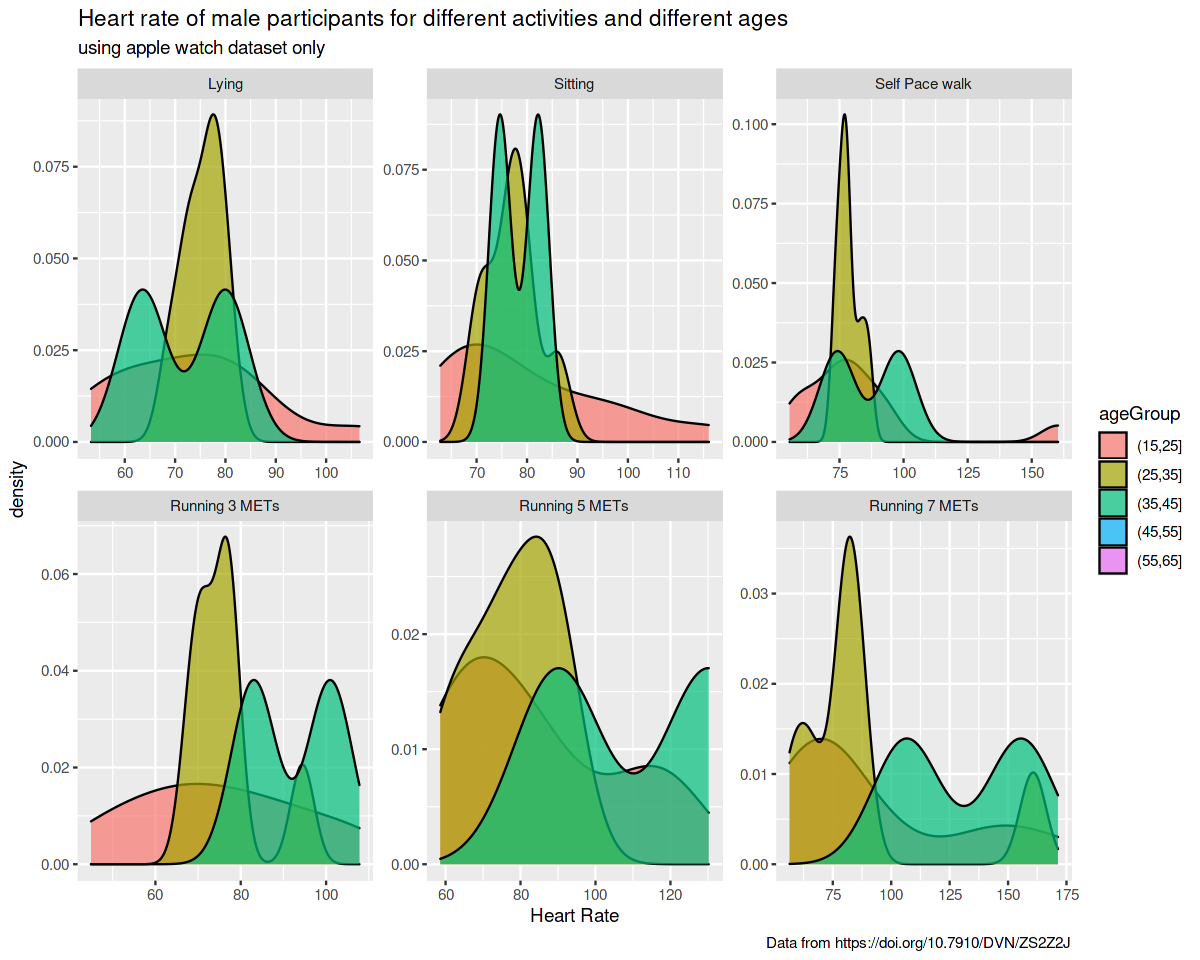

In [27]:
malAggAwDf <- aggAwDf %>% filter(gender=='male')
ggplot(malAggAwDf, aes(x=heartrate, fill=ageGroup)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity, scale='free') +
    labs(title='Heart rate of male participants for different activities and different ages', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Heart Rate'
        )

From the plots above, it looks like the difference could be because of the low number of participants with age < 35. I will restrict to those ages.

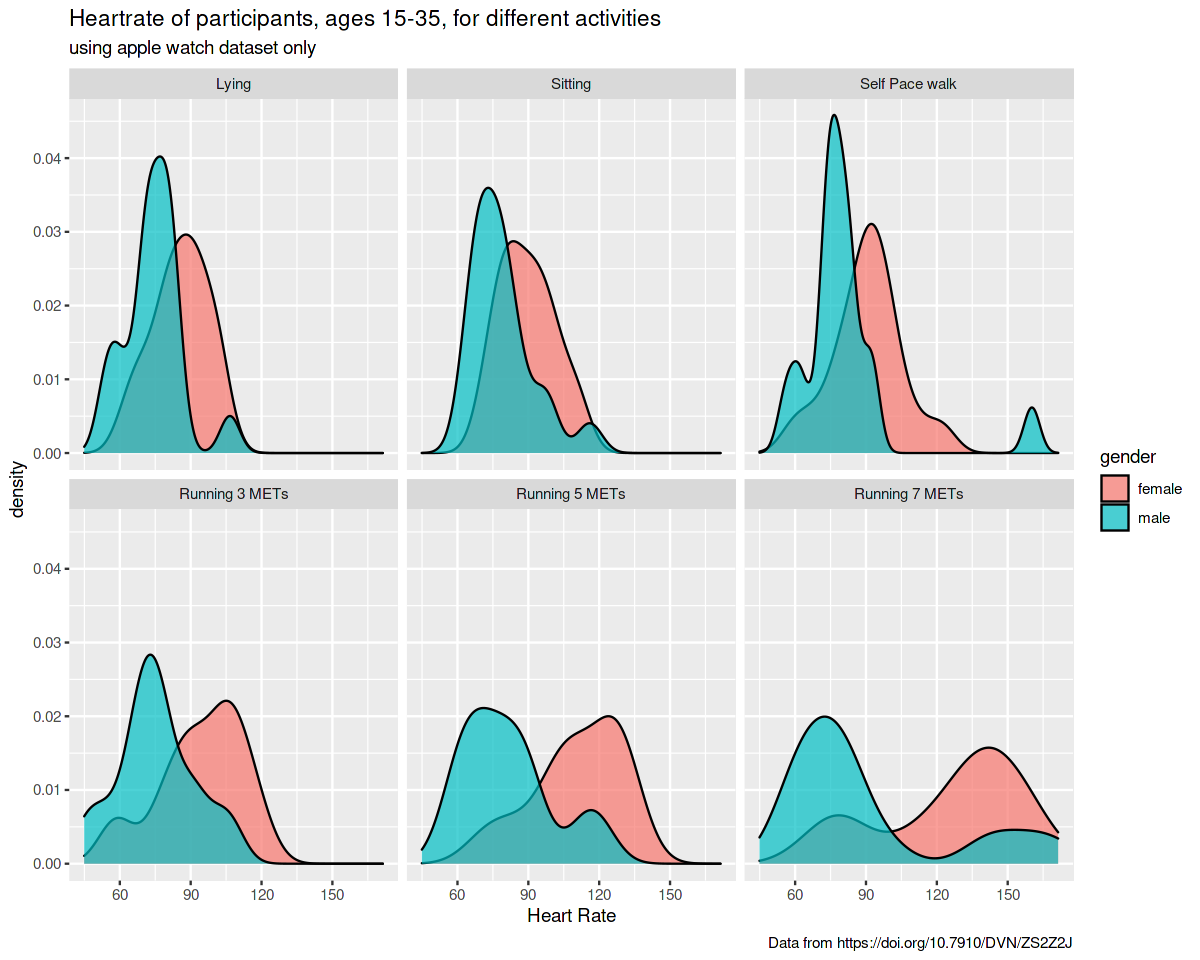

In [28]:
youngAggAwDf <- filter(aggAwDf, age<35)
ggplot(youngAggAwDf, aes(x=heartrate, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Heartrate of participants, ages 15-35, for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Heart Rate'
        )

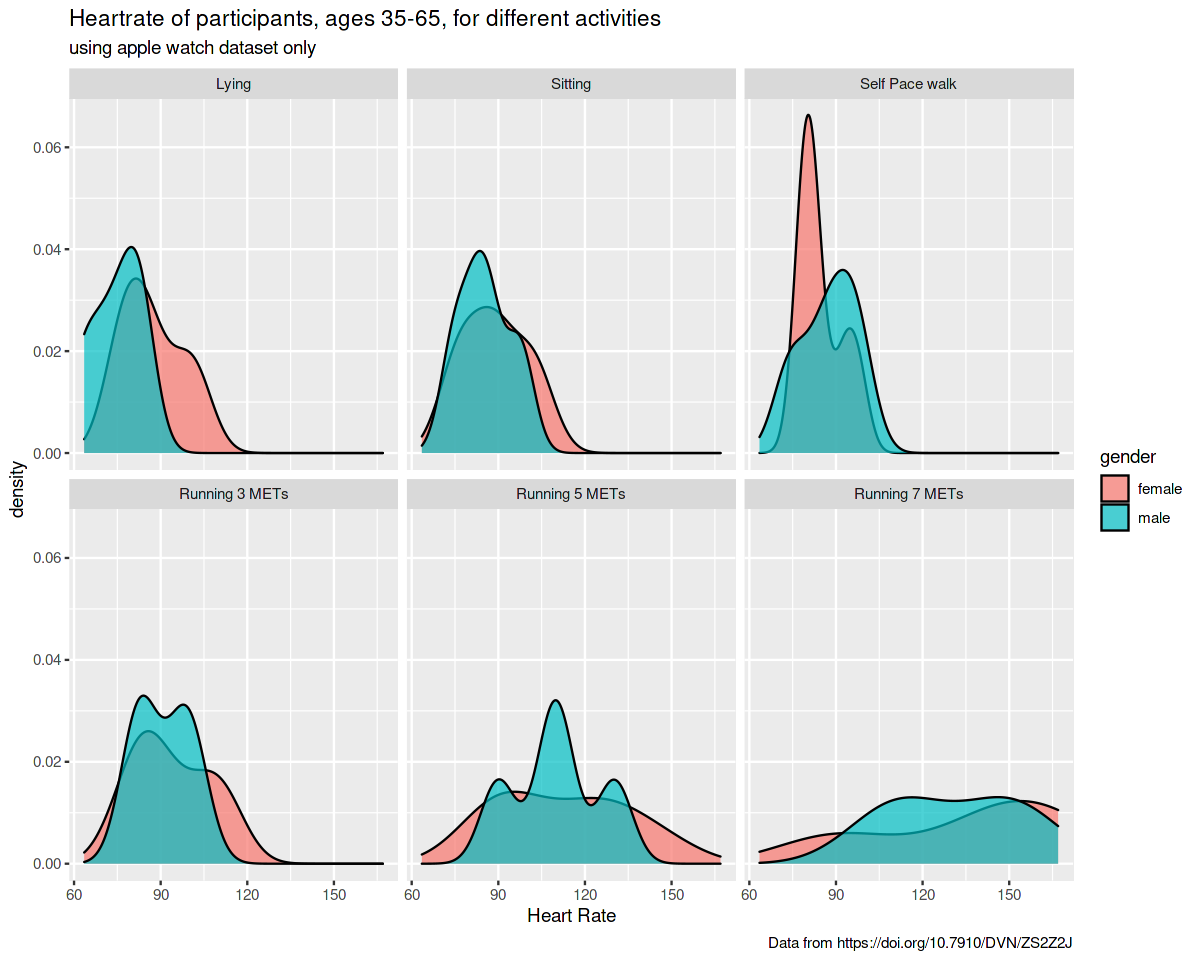

In [29]:
seniorAggAwDf <- filter(aggAwDf, age>35)
ggplot(seniorAggAwDf, aes(x=heartrate, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Heartrate of participants, ages 35-65, for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Heart Rate'
        )

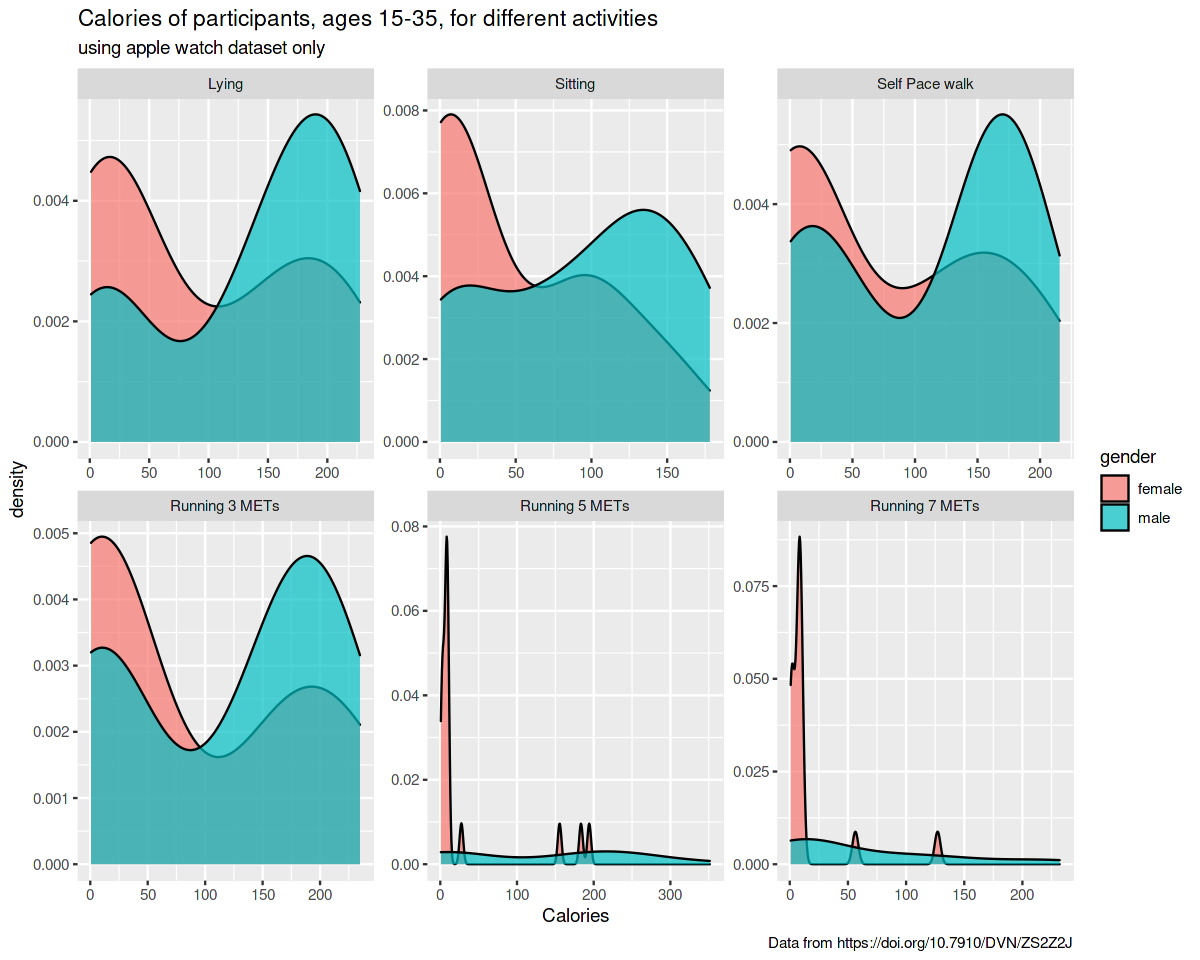

In [30]:
ggplot(youngAggAwDf, aes(x=calories, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity, scale='free') +
    labs(title='Calories of participants, ages 15-35, for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Calories'
        )

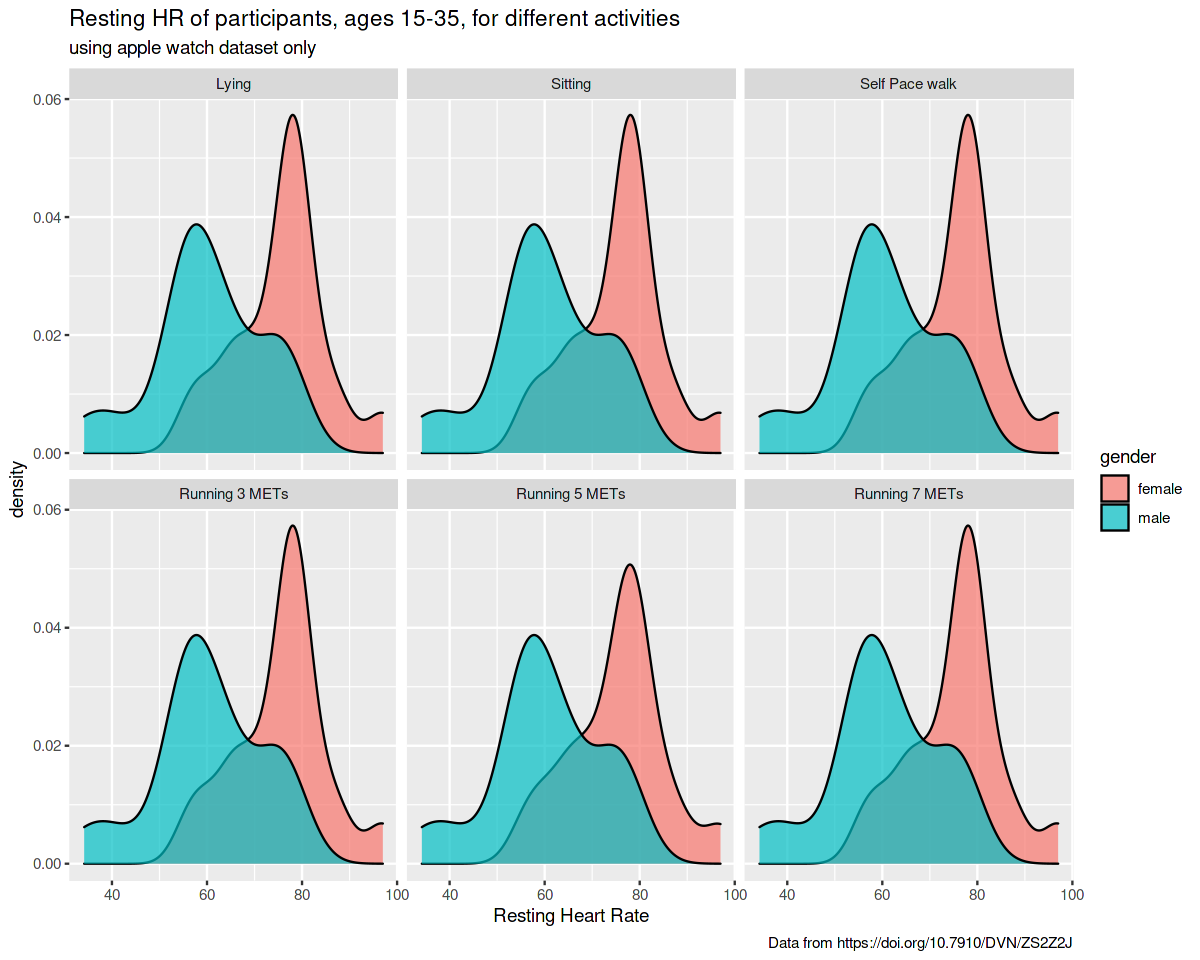

In [31]:
ggplot(youngAggAwDf, aes(x=restingHR, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity) +
    labs(title='Resting HR of participants, ages 15-35, for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Resting Heart Rate'
        )

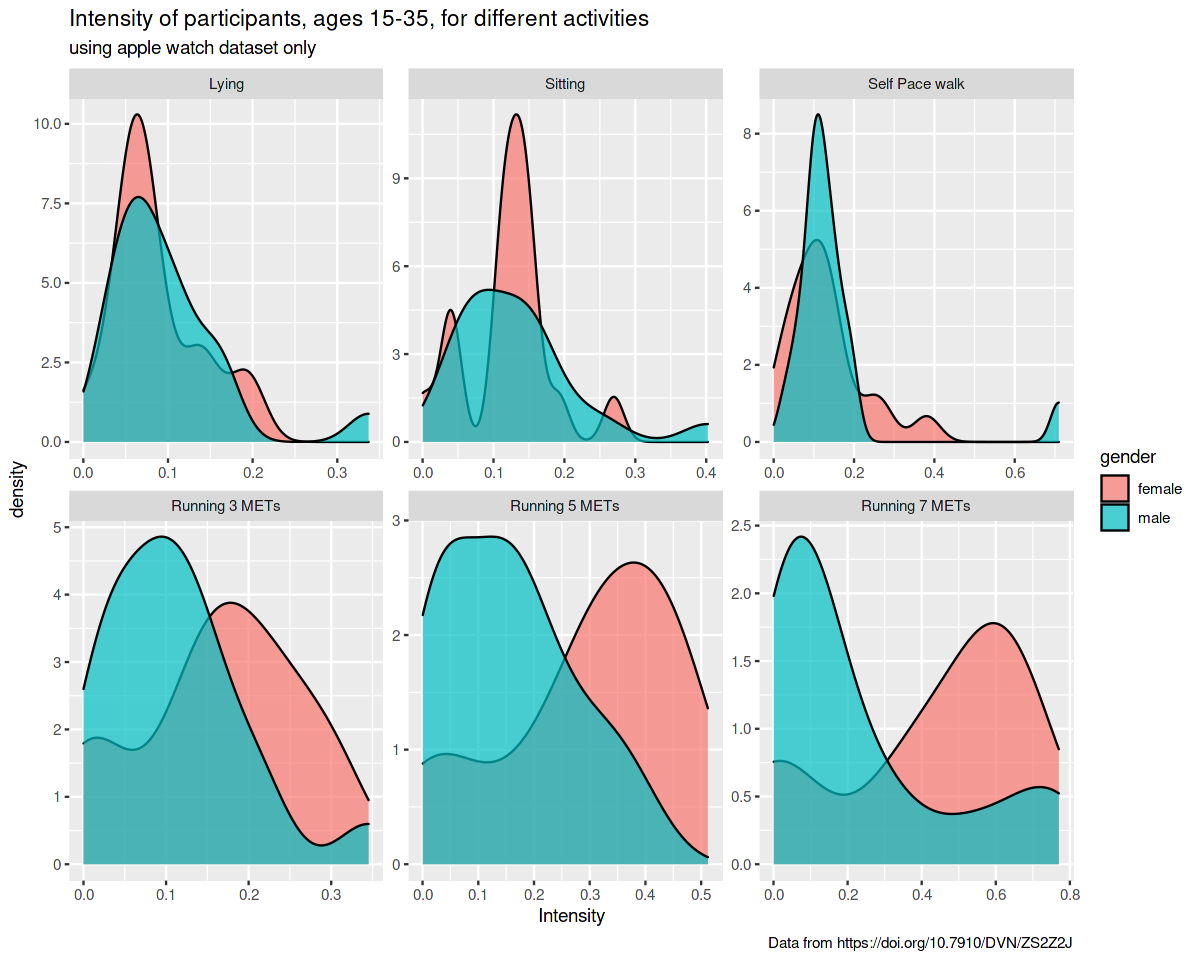

In [32]:
ggplot(youngAggAwDf, aes(x=intensity, fill=gender)) + 
    geom_density(alpha=0.7) +  
    facet_wrap(~activity, scale='free') +
    labs(title='Intensity of participants, ages 15-35, for different activities', 
         subtitle="using apple watch dataset only", 
         caption='Data from https://doi.org/10.7910/DVN/ZS2Z2J',
         x='Intensity'
        )